In [2]:
from causal_ccm.causal_ccm import ccm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [6]:
df_india_tweets = pd.read_csv('india_states_tweet_count.csv')
df_india_shortage = pd.read_csv('resources_data_used_for_india.csv')

In [7]:
#df_us_shortage['date'] = df_us_shortage['date'].apply(lambda d: d.replace('/', '-'))

In [8]:
df_india_tweets

,date_time,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state
0,2020-02-01,296,350,11,657,0.450533,0.016743,0.532725,Haryana
1,2020-02-02,1599,1588,848,4035,0.396283,0.210161,0.393556,Haryana
2,2020-02-03,138,246,68,452,0.305310,0.150442,0.544248,Haryana
3,2020-02-04,304,54,3,361,0.842105,0.008310,0.149584,Haryana
4,2020-02-05,34,12,1,47,0.723404,0.021277,0.255319,Haryana
...,...,...,...,...,...,...,...,...,...
12458,2021-03-27,3,0,1,4,0.750000,0.250000,0.000000,Meghalaya
12459,2021-03-28,1,0,0,1,1.000000,0.000000,0.000000,Meghalaya
12460,2021-03-29,2,0,0,2,1.000000,0.000000,0.000000,Meghalaya
12461,2021-03-30,3,4,3,10,0.300000,0.300000,0.400000,Meghalaya


In [10]:
df_india_shortage

,location_id,date,version_name,location_name,inf_mean,inf_upper,inf_lower,seir_cumulative_mean,seir_cumulative_lower,seir_cumulative_upper,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,all_bed_capacity,icu_bed_capacity,infection_fatality,infection_detection,infection_hospitalization
0,1,2021-01-01,reference,Global,7171462.40,7748841.00,6504160.91,5138739.00,4187604.70,6211368.67,...,0.000047,0.000005,94949.201640,116626.534341,80505.804654,17518594.0,536960.0,0.0040,0.0985,0.0145
1,1,2021-01-02,reference,Global,7110153.50,7706397.04,6443465.35,5165413.36,4209719.81,6242896.94,...,0.000058,0.000016,95647.686647,117544.005117,81063.672212,17518594.0,536960.0,0.0040,0.0995,0.0145
2,1,2021-01-03,reference,Global,7050964.73,7658904.81,6383773.17,5192194.27,4231918.50,6274529.92,...,0.000073,0.000022,96322.317115,118224.114780,81504.320156,17518594.0,536960.0,0.0041,0.1008,0.0145
3,1,2021-01-04,reference,Global,6980448.94,7597716.05,6314841.94,5219002.94,4254147.30,6306177.33,...,0.000078,0.000027,96837.844871,118724.871543,81890.241343,17518594.0,536960.0,0.0041,0.1014,0.0145
4,1,2021-01-05,reference,Global,6887957.60,7554235.30,6205486.35,5246285.21,4276799.00,6338358.25,...,0.000081,0.000035,97512.348885,119551.065884,82414.317725,17518594.0,536960.0,0.0042,0.1026,0.0145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289250,60392,2020-12-27,reference,Thuringia,2825.36,3250.61,2313.29,1089.55,944.72,1319.71,...,0.000000,0.000000,74.111633,74.111633,74.111633,NaN,NaN,0.0184,0.2842,0.0251
289251,60392,2020-12-28,reference,Thuringia,2831.01,3235.55,2348.37,1126.93,977.10,1365.05,...,0.000000,0.000000,73.693265,73.693265,73.693265,NaN,NaN,0.0189,0.2917,0.0262
289252,60392,2020-12-29,reference,Thuringia,2820.14,3262.11,2375.72,1164.87,1009.95,1411.06,...,0.000000,0.000000,74.478980,74.478980,74.478980,NaN,NaN,0.0185,0.2970,0.0269
289253,60392,2020-12-30,reference,Thuringia,2786.02,3238.20,2358.20,1203.18,1043.13,1457.52,...,0.000000,0.000000,75.948367,75.948367,75.948367,NaN,NaN,0.0179,0.2968,0.0275


In [15]:
india_subdivisions = open('indian_entities_list').readlines()
india_subdivisions = [s[1:-3].strip() for s in india_subdivisions]

In [16]:
india_subdivisions

['Haryana',
 'Madhya Pradesh',
 'Lakshadweep',
 'Tamil Nadu',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Uttarakhand',
 'Gujarat',
 'Manipur',
 'Himachal Pradesh',
 'Punjab',
 'Karnataka',
 'Jharkhand',
 'Bihar',
 'Dadra and Nagar Haveli',
 'Arunachal Pradesh',
 'Sikkim',
 'Mizoram',
 'Chandigarh',
 'Goa',
 'Assam',
 'Kerala',
 'West Bengal',
 'Maharashtra',
 'Tripura',
 'Daman and Diu',
 'Delhi',
 'Puducherry',
 'Uttar Pradesh',
 'Rajasthan',
 'Nagaland',
 'Jammu and Kashmir',
 'Odisha',
 'Telangana',
 'Chhattisgarh',
 'Meghala']

In [22]:
sorted(df_us_tweets['date_time'].unique())

['2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-

In [23]:
sorted(df_us_shortage['date'].unique())

['2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-

In [17]:
# take the data from bihar
df_india_tweets_bihar   = df_india_tweets.loc[
    (df_us_tweets['state'] == 'Bihar') &
    (df_us_tweets['date_time'] >= '2020-03-01') &
    (df_us_tweets['date_time'] < '2020-11-01')
].sort_values('date_time')
df_india_shortage_bihar = df_india_shortage.loc[
    (df_us_shortage['location_name'] == 'Bihar') &
    (df_us_shortage['date'] >= '2020-03-01') &
    (df_us_shortage['date'] < '2020-11-01')
].sort_values('date')

In [18]:
df_india_tweets_bihar

,date_time,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state
4710,2020-03-01,151,11,1,163,0.926380,0.006135,0.067485,Bihar
4711,2020-03-02,151,15,0,166,0.909639,0.000000,0.090361,Bihar
4712,2020-03-03,50,31,5,86,0.581395,0.058140,0.360465,Bihar
4713,2020-03-04,91,105,12,208,0.437500,0.057692,0.504808,Bihar
4714,2020-03-05,195,130,11,336,0.580357,0.032738,0.386905,Bihar
...,...,...,...,...,...,...,...,...,...
4942,2020-10-27,596,298,61,955,0.624084,0.063874,0.312042,Bihar
4943,2020-10-28,1286,719,344,2349,0.547467,0.146445,0.306088,Bihar
4944,2020-10-29,635,441,107,1183,0.536771,0.090448,0.372781,Bihar
4945,2020-10-30,155,134,59,348,0.445402,0.169540,0.385057,Bihar


In [19]:
df_india_shortage_bihar

,location_id,date,version_name,location_name,inf_mean,inf_upper,inf_lower,seir_cumulative_mean,seir_cumulative_lower,seir_cumulative_upper,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,all_bed_capacity,icu_bed_capacity,infection_fatality,infection_detection,infection_hospitalization
256413,4844,2020-03-01,reference,Bihar,1103.25,2098.43,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
256414,4844,2020-03-02,reference,Bihar,1405.75,2143.35,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
256415,4844,2020-03-03,reference,Bihar,1592.06,2089.54,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
256416,4844,2020-03-04,reference,Bihar,1657.93,2122.30,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
256417,4844,2020-03-05,reference,Bihar,1561.51,2116.10,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256653,4844,2020-10-27,reference,Bihar,91402.42,99057.87,81119.03,52187.98,36105.25,73152.29,...,0.0,0.0,1006.509647,1414.571952,682.079036,30501.0,1750.0,0.0025,0.0070,0.0088
256654,4844,2020-10-28,reference,Bihar,90809.23,100139.83,79903.21,52534.41,36344.91,73637.87,...,0.0,0.0,969.554491,1373.353404,661.596737,30501.0,1750.0,0.0025,0.0071,0.0088
256655,4844,2020-10-29,reference,Bihar,89554.24,99428.48,77731.11,52872.71,36578.94,74112.06,...,0.0,0.0,933.631936,1325.726297,644.887439,30501.0,1750.0,0.0025,0.0072,0.0088
256656,4844,2020-10-30,reference,Bihar,87637.83,97110.80,71961.26,53194.75,36801.73,74563.46,...,0.0,0.0,909.873477,1286.604339,639.362961,30501.0,1750.0,0.0024,0.0075,0.0089


In [42]:
df_us_tweets_CA['date_time'].to_numpy()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-

In [41]:
df_us_shortage_CA['date'].to_numpy()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-

In [45]:
# some columns in the shortage data is not in the tweets data
np.setdiff1d(df_us_shortage_CA['date'].to_numpy(), df_us_tweets_CA['date_time'].to_numpy())

array(['2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
       '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23'],
      dtype=object)

In [20]:
df_bihar_merged = pd.merge(df_india_tweets_bihar, df_india_shortage_bihar, left_on='date_time', right_on='date', how='inner').drop('date_time', axis=1).sort_values('date')

In [21]:
df_bihar_merged

,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state,location_id,date,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,all_bed_capacity,icu_bed_capacity,infection_fatality,infection_detection,infection_hospitalization
0,151,11,1,163,0.926380,0.006135,0.067485,Bihar,4844,2020-03-01,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
1,151,15,0,166,0.909639,0.000000,0.090361,Bihar,4844,2020-03-02,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
2,50,31,5,86,0.581395,0.058140,0.360465,Bihar,4844,2020-03-03,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
3,91,105,12,208,0.437500,0.057692,0.504808,Bihar,4844,2020-03-04,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
4,195,130,11,336,0.580357,0.032738,0.386905,Bihar,4844,2020-03-05,...,0.0,0.0,0.000000,0.000000,0.000000,30501.0,1750.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,596,298,61,955,0.624084,0.063874,0.312042,Bihar,4844,2020-10-27,...,0.0,0.0,1006.509647,1414.571952,682.079036,30501.0,1750.0,0.0025,0.0070,0.0088
233,1286,719,344,2349,0.547467,0.146445,0.306088,Bihar,4844,2020-10-28,...,0.0,0.0,969.554491,1373.353404,661.596737,30501.0,1750.0,0.0025,0.0071,0.0088
234,635,441,107,1183,0.536771,0.090448,0.372781,Bihar,4844,2020-10-29,...,0.0,0.0,933.631936,1325.726297,644.887439,30501.0,1750.0,0.0025,0.0072,0.0088
235,155,134,59,348,0.445402,0.169540,0.385057,Bihar,4844,2020-10-30,...,0.0,0.0,909.873477,1286.604339,639.362961,30501.0,1750.0,0.0024,0.0075,0.0089


In [22]:
#np.nan_to_num(df_CA_merged['prop_neg'].to_numpy(), nan=0.0)
X = df_bihar_merged['prop_neg'].to_numpy()
Y = df_bihar_merged['icu_beds_mean'].to_numpy()

In [23]:
assert X.shape == Y.shape
assert np.count_nonzero(~np.isnan(X)) == np.count_nonzero(~np.isnan(Y))
assert np.count_nonzero(~np.isnan(X)) == X.shape[0]

In [30]:
# inputs
tau = 1 # time lag
E = 8 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm1 = ccm(X, Y, tau, E, L)

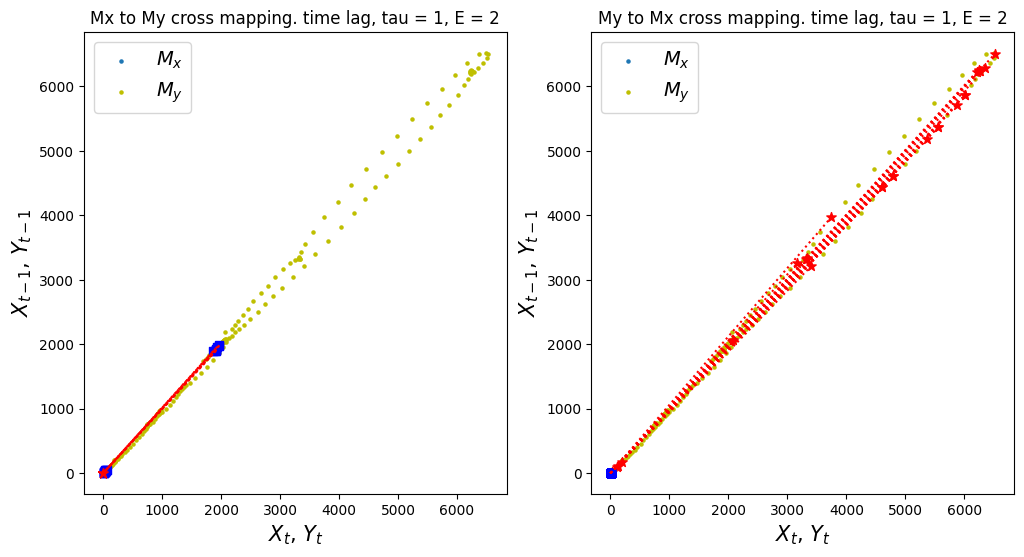

In [31]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

In [32]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm1.causality()
corr_, p

(0.46705977941775306, 7.294551011906903e-14)

In [33]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship
ccm1.plot_ccm_correls()

IndexError: index 0 is out of bounds for axis 0 with size 0

X->Y r 0.47 p value 0.0
Y->X r 0.71 p value 0.0


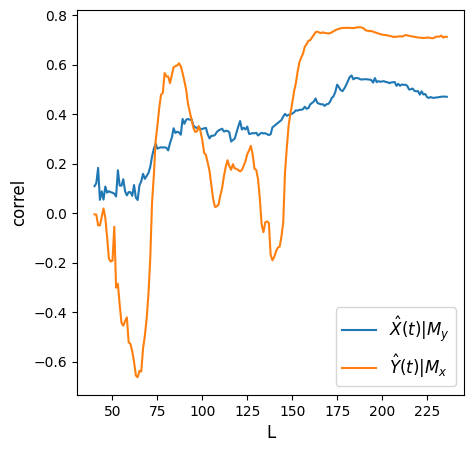

In [35]:
# checking convergence
# Looking at "convergence"
L_range = range(40, len(X), 1) # L values to test
tau = 1
E = 8

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})